In [9]:
import pandas as pd
# Replace 'your_dataset.csv' with the path to your dataset file
W_df = pd.read_csv("E:/Class/Walmart-Sales-trends/WalmartSQL repository..csv", sep=';')

In [10]:
W_df.shape

(1000, 20)

In [11]:
# Display the first few rows of the dataset
W_df.head()
print(W_df.head())

    invoice_id branch       city customer_type  gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             product_line  unit_price  quantity      vat     total  \
0       Health and beauty       74.69         7  26.1415  548.9715   
1  Electronic accessories       15.28         5   3.8200   80.2200   
2      Home and lifestyle       46.33         7  16.2155  340.5255   
3       Health and beauty       58.22         8  23.2880  489.0480   
4       Sports and travel       86.31         7  30.2085  634.3785   

                  dtme       tme payment_method    cogs  gross_margin_pct  \
0  2019-01-05 00:00:00  13:08:00        Ewallet  522.83            4.7619   
1  2019-03-08 00:00:00  10:29:00           Cash   76.40            4.7619   

In [12]:
# Get a summary of the dataset
print(W_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   invoice_id        1000 non-null   object 
 1   branch            1000 non-null   object 
 2   city              1000 non-null   object 
 3   customer_type     1000 non-null   object 
 4   gender            1000 non-null   object 
 5   product_line      1000 non-null   object 
 6   unit_price        1000 non-null   float64
 7   quantity          1000 non-null   int64  
 8   vat               1000 non-null   float64
 9   total             1000 non-null   float64
 10  dtme              1000 non-null   object 
 11  tme               1000 non-null   object 
 12  payment_method    1000 non-null   object 
 13  cogs              1000 non-null   float64
 14  gross_margin_pct  1000 non-null   float64
 15  gross_income      1000 non-null   float64
 16  rating            1000 non-null   float64
 

In [13]:
# Descriptive statistics
print(W_df.describe())

        unit_price     quantity          vat        total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross_margin_pct  gross_income      rating  
count         1000.0000   1000.000000  1000.00000  
mean             4.7619     15.379369     6.97270  
std              0.0000     11.708825     1.71858  
min              4.7619      0.508500     4.00000  
25%              4.7619      5.924875     5.50000  
50%              4.7619     12

In [14]:
# Check for missing values
print(W_df.isnull().sum())


invoice_id          0
branch              0
city                0
customer_type       0
gender              0
product_line        0
unit_price          0
quantity            0
vat                 0
total               0
dtme                0
tme                 0
payment_method      0
cogs                0
gross_margin_pct    0
gross_income        0
rating              0
time_of_day         0
day_name            0
month_name          0
dtype: int64


In [15]:
# Check for duplicates
print(W_df.duplicated().sum())

0


In [16]:
# List all column names in the DataFrame
print(W_df.columns)

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'unit_price', 'quantity', 'vat', 'total', 'dtme', 'tme',
       'payment_method', 'cogs', 'gross_margin_pct', 'gross_income', 'rating',
       'time_of_day', 'day_name', 'month_name'],
      dtype='object')


In [17]:
# Convert 'dtme' to datetime if it's not already
W_df['dtme'] = pd.to_datetime(W_df['dtme']) 

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
# Setting aesthetic parameters
sns.set()

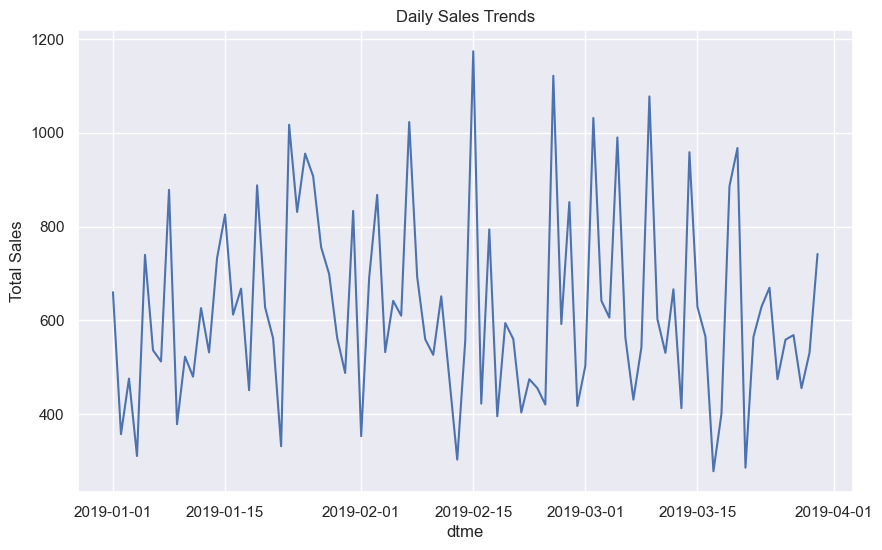

In [ ]:
# Daily Sales Trends
# Assuming 'Date' is the correct column name
plt.figure(figsize=(10,6))
W_df.groupby(W_df['dtme'].dt.date)['unit_price'].sum().plot(kind='line')
plt.title('Daily Sales Trends')
plt.xlabel('dtme')
plt.ylabel('Total Sales')
plt.show()



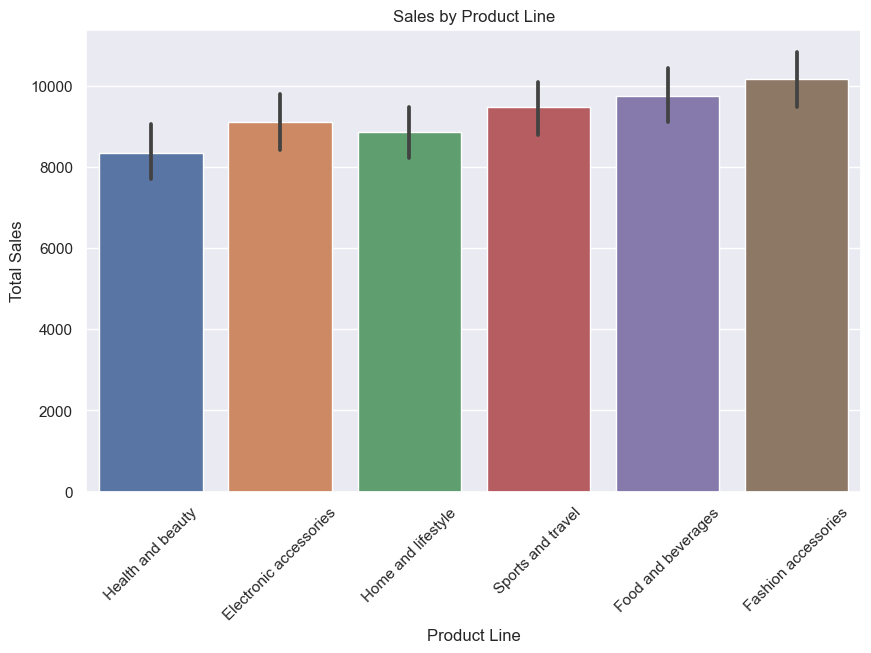

In [ ]:
#Sales by product line
plt.figure(figsize=(10,6))
sns.barplot(x='product_line', y='unit_price', data= W_df, estimator=sum)
plt.xticks(rotation=45)
plt.title('Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.show()



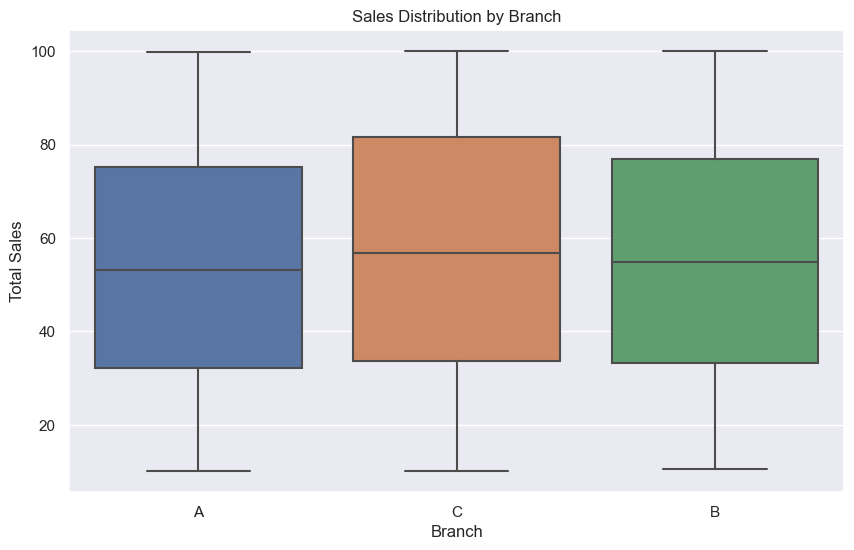

In [ ]:
# Sales Distribution by Branch
plt.figure(figsize=(10,6))
sns.boxplot(x='branch', y='unit_price', data=W_df)
plt.title('Sales Distribution by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.show()

In [ ]:
W_df['branch'].head()

0    A
1    C
2    A
3    A
4    A
Name: branch, dtype: object

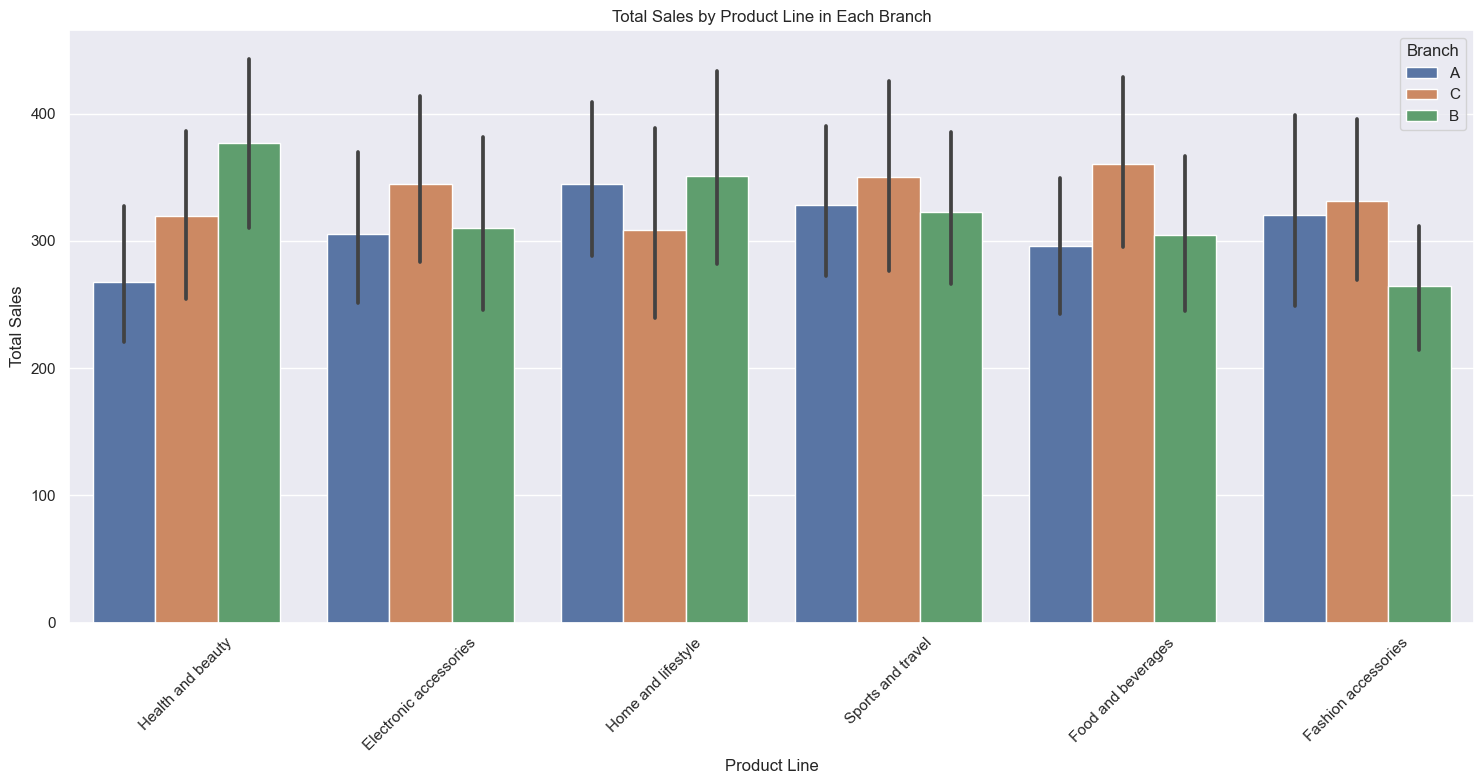

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(x='product_line', y='total', hue='branch', data=W_df)
plt.title('Total Sales by Product Line in Each Branch')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.legend(title='Branch')
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

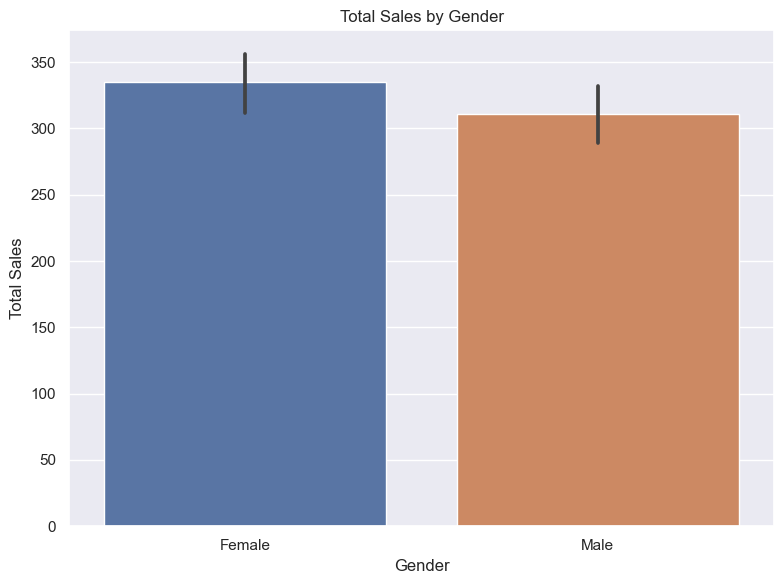

In [ ]:
# Total Sales by gender

plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='total', data=W_df)
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

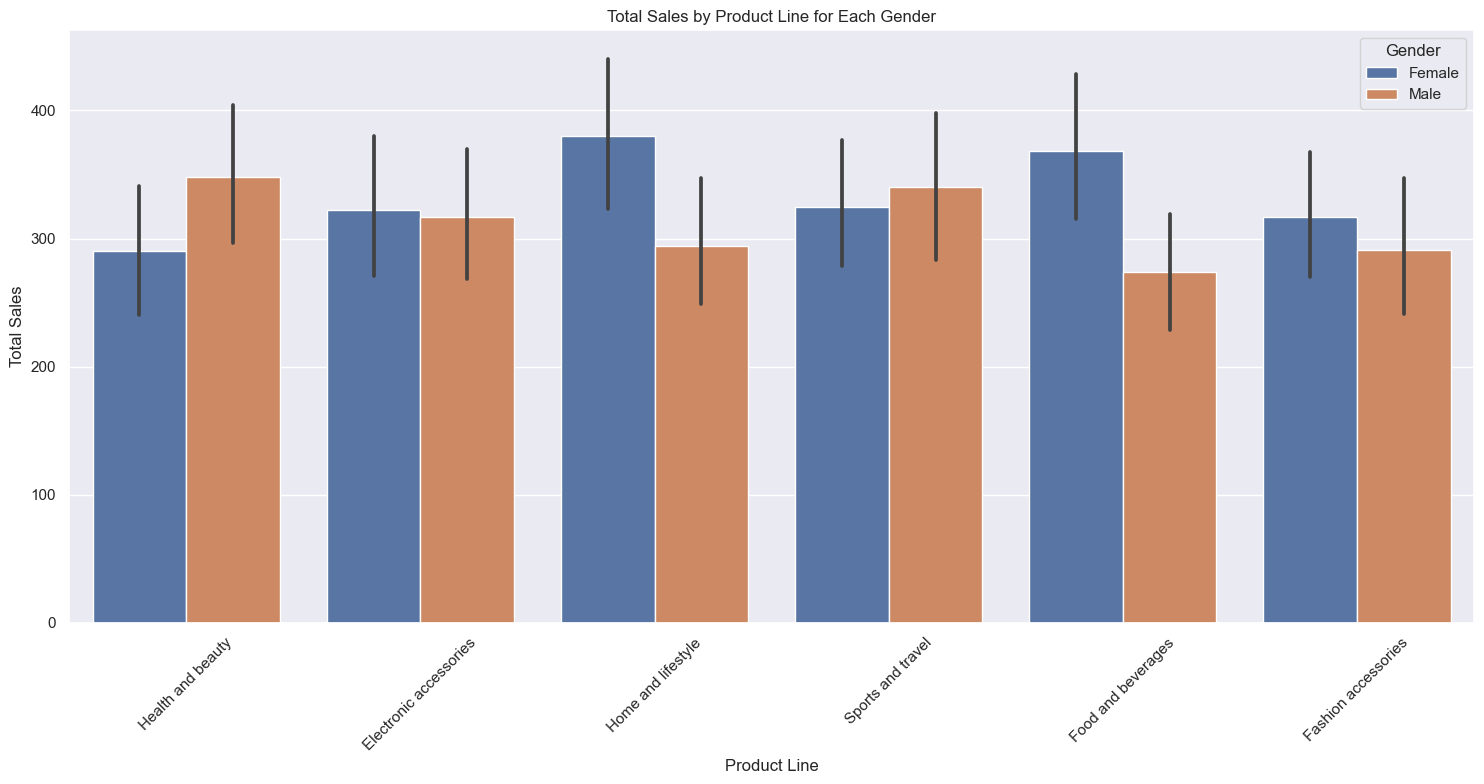

In [ ]:
# Total Sales by Product Line for Each Gender
plt.figure(figsize=(15, 8))
sns.barplot(x='product_line', y='total', hue='gender', data=W_df)
plt.title('Total Sales by Product Line for Each Gender')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [21]:
# Descriptive statistics
descriptive_stats = W_df.describe()
descriptive_stats

,unit_price,quantity,vat,total,cogs,gross_margin_pct,gross_income,rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.0000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.7619,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.0000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.7619,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.7619,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.7619,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.7619,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.7619,49.650000,10.00000



[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


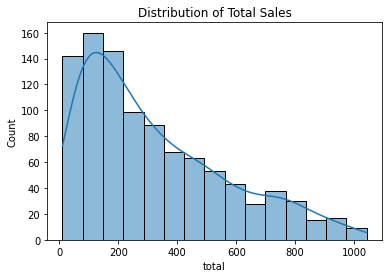

In [27]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

#Distribution of total sales
sns.histplot(W_df['total'], kde=True)
plt.title('Distribution of Total Sales')
plt.show()

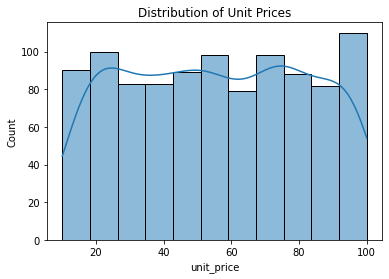

In [29]:
# Distribution of unit prices
sns.histplot(W_df['unit_price'], kde=True)
plt.title('Distribution of Unit Prices')
plt.show()

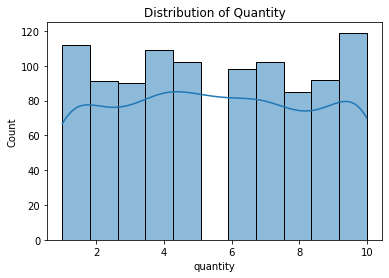

In [31]:
# Distribution of quantity
sns.histplot(W_df['quantity'], kde=True)
plt.title('Distribution of Quantity')
plt.show()

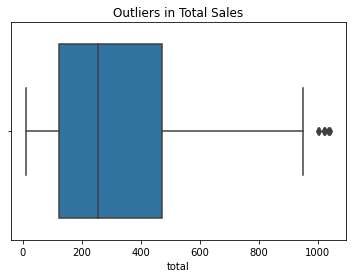

In [33]:
# Detecting outliers in total sales
sns.boxplot(x=W_df['total'])
plt.title('Outliers in Total Sales')
plt.show()

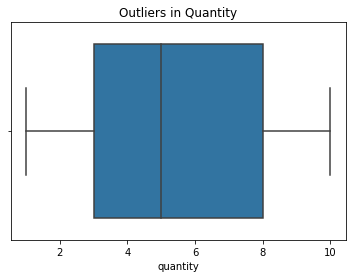

In [35]:
# Detecting outliers in quantity
sns.boxplot(x=W_df['quantity'])
plt.title('Outliers in Quantity')
plt.show()

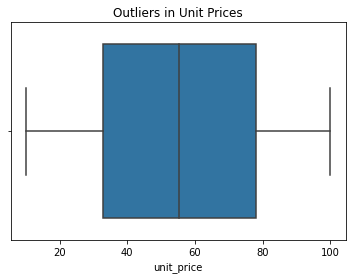

In [37]:
# Detecting outliers in unit prices
sns.boxplot(x=W_df['unit_price'])
plt.title('Outliers in Unit Prices')
plt.show()

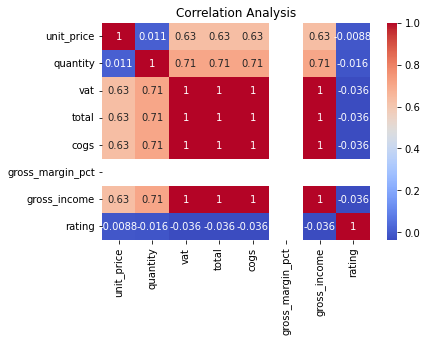

In [39]:
# Correlation matrix
correlation_matrix = W_df.corr()

# Visualizing the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis')
plt.show()

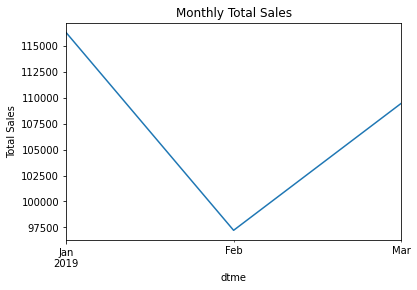

In [41]:
# Setting the datetime column as the index
W_df.set_index('dtme', inplace=True)

# Resampling to monthly total sales
monthly_sales = W_df['total'].resample('M').sum()

# Plotting monthly total sales
monthly_sales.plot(title='Monthly Total Sales', ylabel='Total Sales')
plt.show()